## Data analysis ##

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
print("Hello World!")

Hello World!


In [3]:
# Define the base path to your CSV files
#base_path = '/Users/sandervanduin/Desktop/HVA weekly /Digitial Marketing Strategy/DMSteam9'
base_path = '/Users/sandervanduin/Desktop/HVA weekly /Digitial Marketing Strategy/DMSteam9'

# Explicitly load each CSV file into its own DataFrame
df1 = pd.read_csv(os.path.join(base_path, 'Themeparcs I.csv'), on_bad_lines='skip', delimiter=';')
df2 = pd.read_csv(os.path.join(base_path, 'Themeparcs II.csv'), on_bad_lines='skip', delimiter=';')
df3 = pd.read_csv(os.path.join(base_path, 'Themeparcs III.csv'), on_bad_lines='skip', delimiter=';')
df4 = pd.read_csv(os.path.join(base_path, 'Themeparcs IV.csv'), on_bad_lines='skip', delimiter=';')

# Example operation: print the first few rows of the DataFrame
merged_df = pd.concat([df1, df2, df3, df4], ignore_index=True)
print("First few rows of Merged Themeparcs :")
merged_df.head(5)

First few rows of Merged Themeparcs :


,Date,Profile,Message,Number of Reactions,Number of Shares,Number of Comments (primary),Number of Shares.1,Comments per post,Comments on posts by fans,Post interaction rate,Engagement,Number of Likes,Link-posts,Picture Posts,Video-posts,Profile-ID,Post-ID,Link
0,12/31/23 9:40 PM,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16.0,NaN,2.0,2.0,2.0,2.0,"1,09E+12","1,09E+12",13.0,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...
1,12/31/23 8:01 PM,Fun Spot America,See you next year! 😉 Don’t miss...,38.0,NaN,1.0,2.0,1.0,1.0,"4,17E+11","4,17E+11",33.0,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...
2,12/31/23 7:30 PM,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23.0,NaN,2.0,3.0,2.0,2.0,"2,85E+11","2,85E+11",21.0,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...
3,12/31/23 7:00 PM,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646.0,NaN,52.0,12.0,56.0,56.0,"1,36E+11","1,36E+11",478.0,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...
4,12/31/23 7:00 PM,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17.0,NaN,2.0,0.0,2.0,2.0,"4,96E+11","4,96E+11",16.0,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...


In [4]:
# Display the DataFrame's information, including index dtype and columns, non-null values, and memory usage
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15443 entries, 0 to 15442
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          15443 non-null  object 
 1   Profile                       15443 non-null  object 
 2   Message                       15443 non-null  object 
 3   Number of Reactions           15443 non-null  float64
 4   Number of Shares              0 non-null      float64
 5   Number of Comments (primary)  15443 non-null  float64
 6   Number of Shares.1            15443 non-null  float64
 7   Comments per post             15443 non-null  float64
 8   Comments on posts by fans     15443 non-null  float64
 9   Post interaction rate         15443 non-null  object 
 10  Engagement                    15443 non-null  object 
 11  Number of Likes               15443 non-null  float64
 12  Link-posts                    555 non-null    float64
 13  P

In [5]:
# Assuming your DataFrame is named df
unique_profiles = merged_df.drop_duplicates(subset=['Profile-ID'])

# Print the unique profiles
print(unique_profiles[['Profile', 'Profile-ID']])

                                          Profile        Profile-ID
0                      Wild Adventures Theme Park       84679583132
1                                Fun Spot America        1,8402E+11
3                                Disneyland Paris       6,52389E+14
4                           Silverwood Theme Park       7,62702E+14
5                                    Belmont Park       83231004302
6                                SeaWorld Orlando  1782696285170057
7                             Canada's Wonderland       95469803923
8                              SeaWorld San Diego       4,26112E+14
9                                  Lake Compounce       80018245271
10                        Happy Hollow Park & Zoo       1,32943E+11
12                  Universal Orlando Resort (US)       90867402851
13                        Busch Gardens Tampa Bay       68181225238
14                                    Hersheypark       16994689356
15                                 Gilroy Garden

In [6]:
# Counts of unique values for a specific column
merged_df['Profile'].value_counts()

Profile
Wild Adventures Theme Park                     955
Happy Hollow Park & Zoo                        627
Cedar Point                                    478
Walt Disney Studios (US)                       450
Playland                                       446
Walt Disney Animation Studios                  432
Fun Spot America                               414
Belmont Park                                   408
Knott's Berry Farm                             402
Six Flags Discovery Kingdom                    401
Busch Gardens Tampa Bay                        399
Kings Island                                   396
Busch Gardens Williamsburg                     396
SeaWorld Orlando                               395
SeaWorld San Diego                             388
Hersheypark                                    383
SkyPark at Santa's Village                     382
Six Flags Great Adventure                      368
Santa Cruz Beach Boardwalk                     351
Lake Compounce         

In [7]:
# Mean or average of a column
print(merged_df['Number of Reactions'].mean())

# Median of a column
print(merged_df['Number of Reactions'].median())

494.2829113514214
67.0


In [8]:
# Compute pairwise correlation of columns, excluding NA/null values
numeric_merged_df = merged_df.select_dtypes(include=[np.number])
print(numeric_merged_df.corr())

                              Number of Reactions  Number of Shares  \
Number of Reactions                      1.000000               NaN   
Number of Shares                              NaN               NaN   
Number of Comments (primary)             0.528398               NaN   
Number of Shares.1                       0.845981               NaN   
Comments per post                        0.498470               NaN   
Comments on posts by fans                0.498470               NaN   
Number of Likes                          0.963353               NaN   
Link-posts                                    NaN               NaN   
Picture Posts                                 NaN               NaN   
Video-posts                                   NaN               NaN   

                              Number of Comments (primary)  \
Number of Reactions                               0.528398   
Number of Shares                                       NaN   
Number of Comments (primary)    

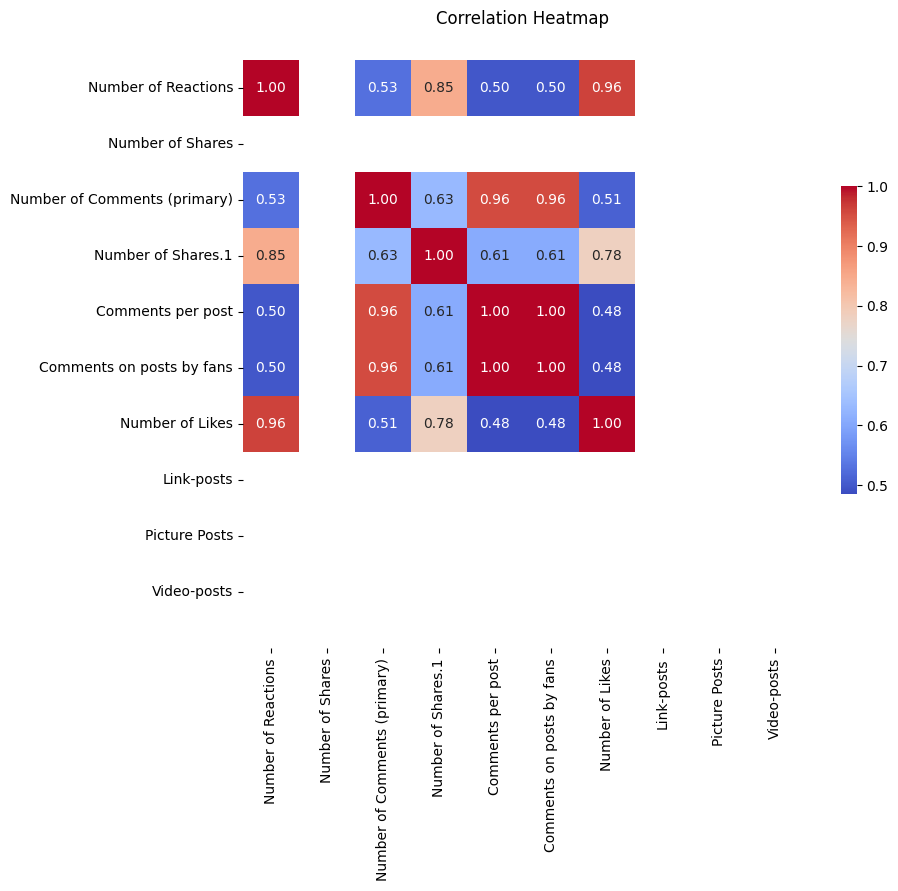

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_merged_df = merged_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numeric_merged_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr.columns, yticklabels=corr.columns,
            cbar_kws={"shrink": .5}, square=True)

# Fix for matplotlib bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.title('Correlation Heatmap')
plt.show()


In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')

# Function to clean text
def clean_text(text):
    # Tokenize text and remove punctuation
    tokens = word_tokenize(text)
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # Remove non-alphabetic tokens and stopwords
    words = [word.lower() for word in stripped if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    return words

# Apply cleaning function to each comment
merged_df['cleaned_Message'] = merged_df['Message'].apply(clean_text)

merged_df

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1002)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1002)>


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/Users/sandervanduin/nltk_data'
    - '/Users/sandervanduin/Desktop/HVA weekly /Digitial Marketing Strategy/DMSteam9/.venv/nltk_data'
    - '/Users/sandervanduin/Desktop/HVA weekly /Digitial Marketing Strategy/DMSteam9/.venv/share/nltk_data'
    - '/Users/sandervanduin/Desktop/HVA weekly /Digitial Marketing Strategy/DMSteam9/.venv/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [ ]:
from nltk.probability import FreqDist

# Concatenate all cleaned comments into a single list
all_words = sum(merged_df['cleaned_Message'], [])

# Calculate frequency distribution
freq_dist = FreqDist(all_words)

# Display the most common words
print(freq_dist.most_common(10))


[('https', 4440), ('day', 2986), ('park', 2797), ('get', 2531), ('fun', 2336), ('season', 2258), ('tickets', 2008), ('us', 1994), ('pass', 1864), ('e', 1839)]


In [ ]:
from textblob import TextBlob

# Function to calculate sentiment
def calculate_sentiment(text):
    return TextBlob(' '.join(text)).sentiment.polarity

# Apply the function to cleaned comments
merged_df['Sentiment'] = merged_df['cleaned_Message'].apply(calculate_sentiment)

merged_df.head(30)


,Date,Profile,Message,Number of Reactions,Number of Shares,Number of Comments (primary),Number of Shares.1,Comments per post,Comments on posts by fans,Post interaction rate,Engagement,Number of Likes,Link-posts,Picture Posts,Video-posts,Profile-ID,Post-ID,Link,cleaned_Message,Sentiment
0,12/31/23 9:40 PM,Wild Adventures Theme Park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16.0,NaN,2.0,2.0,2.0,2.0,"1,09E+12","1,09E+12",13.0,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,"[today, final, day, use, season, passes, nt, m...",0.307143
1,12/31/23 8:01 PM,Fun Spot America,See you next year! 😉 Don’t miss...,38.0,NaN,1.0,2.0,1.0,1.0,"4,17E+11","4,17E+11",33.0,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,"[see, next, year, miss, huge, firework, displa...",0.200000
2,12/31/23 7:30 PM,Fun Spot America,Don't miss our HUGE firework display ! 🥳\n\n#f...,23.0,NaN,2.0,3.0,2.0,2.0,"2,85E+11","2,85E+11",21.0,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,"[nt, miss, huge, firework, display, fireworks,...",0.400000
3,12/31/23 7:00 PM,Disneyland Paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646.0,NaN,52.0,12.0,56.0,56.0,"1,36E+11","1,36E+11",478.0,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,"[fijne, jaarwisseling, en, tot, volgend, jaar]",0.000000
4,12/31/23 7:00 PM,Silverwood Theme Park,It's the last day of our New Year's Sale! Save...,17.0,NaN,2.0,0.0,2.0,2.0,"4,96E+11","4,96E+11",16.0,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,"[last, day, new, year, sale, save, tickets, ma...",0.109091


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Join words back to form the string of comments
merged_df['Cleaned_Comment_Joined'] = merged_df['cleaned_Message'].apply(lambda x: ' '.join(x))

# Create a document-term matrix
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(merged_df['Cleaned_Comment_Joined'])

# LDA model
LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(dtm)

# Display topics
for index, topic in enumerate(LDA.components_):
    print(f'TOPIC #{index}')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')


TOPIC #0
['year', 'join', 'day', 'today', 'new', 'park', 'santa', 'holiday', 'christmas', 'https']


TOPIC #1
['weekend', 'park', 'summer', 'free', 'tickets', 'fun', 'pass', 'day', 'season', 'https']


TOPIC #2
['weekend', 'weather', 'happy', 'visit', 'open', 'ride', 'new', 'today', 'day', 'park']


TOPIC #3
['parque', 'um', 'em', 'você', 'que', 'play', 'com', 'diversao', 'para', 'playland']


TOPIC #4
['rescue', 'https', 'animal', 'sea', 'theaters', 'wish', 'world', 'animals', 'happy', 'disney']




/var/folders/r7/wflk5s9j1jx0y8082yq0zqs40000gn/T/ipykernel_70661/3986793807.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df['Sentiment'])


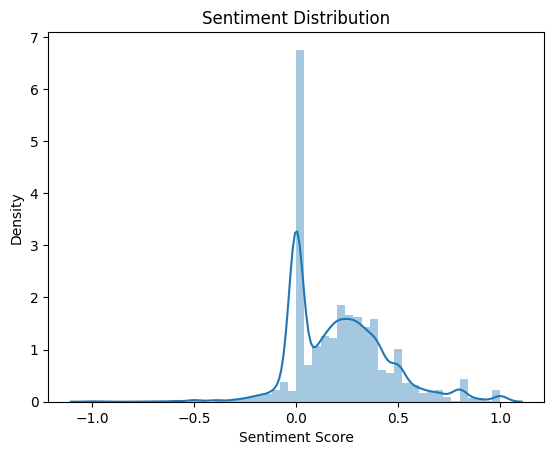

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# For example, plotting the distribution of sentiment
sns.distplot(merged_df['Sentiment'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.show()
